# task 1

In [1]:
import time
from typing import Callable

def measure_method_time(method: Callable, *args) -> list:
    """Measure time usage of a method call"""
    # Measure time
    start_time = time.perf_counter()
    try:
        result = method(*args)
        success = result is not None
        
    except Exception:
        result = None
        success = False
        
    end_time = time.perf_counter()
    
    time_taken = end_time - start_time
    return time_taken, success

In [2]:
import numpy as np
from array import array

def add_1_python_list(lst: list) -> list:
    for i in range(len(lst)):
        lst[i] += 1

    return lst

def add_1_python_array(arr: array) -> array:
    for i in range(len(arr)):
        arr[i] += 1

    return arr

def add_1_numpy_array(np_arr: np.array) -> np.array:
    return np_arr+1

In [3]:
add_1_info = []

for num_elements in [10_000, 100_000, 1_000_000, 10_000_000, 100_000_000]:
    number_list = np.random.randint(1, 10**9, size=num_elements).tolist()
    number_array = array('i', number_list)
    numpy_array = np.array(number_list)
    
    assert num_elements == len(number_list) == len(number_array) == len(numpy_array)
        
    time_python_list, _ = measure_method_time(add_1_python_list, number_list)
    time_python_array, _ = measure_method_time(add_1_python_array, number_array)
    time_numpy_array, _ = measure_method_time(add_1_numpy_array, numpy_array)
    
    add_1_info.append({"num_elements": num_elements, "time_python_list": time_python_list,
                      "time_python_array": time_python_array, "time_numpy_array": time_numpy_array})

In [4]:
import pandas as pd

df = pd.DataFrame(add_1_info)
df

,num_elements,time_python_list,time_python_array,time_numpy_array
0,10000,0.001502,0.001094,0.000023
1,100000,0.002779,0.007917,0.000139
2,1000000,0.034514,0.042235,0.000523
3,10000000,0.251745,0.357808,0.005106
4,100000000,2.547022,3.635110,0.071978


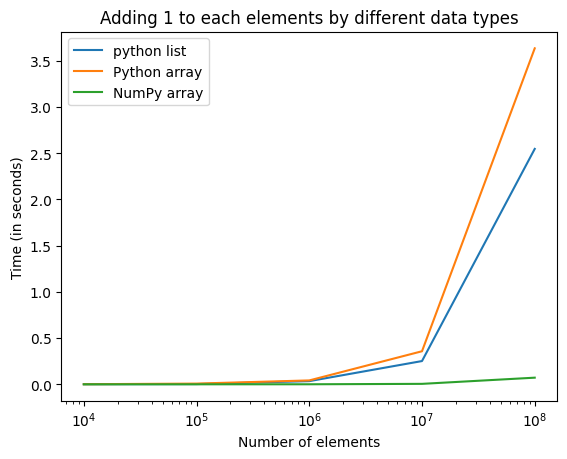

In [5]:
import matplotlib.pyplot as plt

plt.semilogx('num_elements', 'time_python_list', data=df, label = "python list")
plt.semilogx('num_elements', 'time_python_array', data=df, label = "Python array")
plt.semilogx('num_elements', 'time_numpy_array', data=df, label = "NumPy array")
plt.title("Adding 1 to each elements by different data types")
plt.xlabel("Number of elements")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.show();

NumPy array is very fast, while Python array is slower than Python list.

# task 2

In [1]:
import numpy as np

num_elements = 10_000_000

list_1 = np.random.randint(1, 10**9, size=num_elements).tolist()
list_2 = sorted(list_1)

assert num_elements == len(list_1) == len(list_2)

In [21]:
from bisect import bisect_left

def search_in_unsorted_list(number: int, number_list: list) -> bool:
    for i in range(len(number_list)):
        if number_list[i] == number:
            return i

    return -1

def search_in_sorted_list(number: int, number_list: list) -> bool:
    i = bisect_left(number_list, number)
    if i != len(number_list) and number_list[i] == number:
        return i
    else:
        return -1

def insert_to_unsorted_list(number: int, number_list: list) -> bool:
    number_list = number_list.copy()
    return number_list.append(number)

def insert_to_sorted_list(number: int, number_list: list) -> bool:
    number_list = number_list.copy()
    number_list.append(number)
    return sorted(number_list)

In [25]:
import time

num_elements_to_search = 90
num_elements_to_insert = 10

def perform_tasks(num_elements_to_search, num_elements_to_insert):
    # generating tasks
    numbers_to_search = np.random.randint(1, 10**9, size=num_elements_to_search).tolist()
    numbers_to_insert = np.random.randint(1, 10**9, size=num_elements_to_insert).tolist()

    # unsorted
    start_time_unsorted = time.perf_counter()
    for num in numbers_to_search:
        result = search_in_unsorted_list(num, list_1)
        
    for num in numbers_to_insert:
        result = insert_to_unsorted_list(num, list_1)
        
    end_time_unsorted = time.perf_counter()

    # sorted
    start_time_sorted = time.perf_counter()
    for num in numbers_to_search:
        result = search_in_sorted_list(num, list_2)
        
    for num in numbers_to_insert:
        result = insert_to_sorted_list(num, list_2)
        
    end_time_sorted = time.perf_counter()

    time_taken_unsorted = end_time_unsorted - start_time_unsorted
    time_taken_sorted = end_time_sorted - start_time_sorted

    return time_taken_unsorted, time_taken_sorted

In [26]:
time_taken_unsorted1, time_taken_sorted1 = perform_tasks(900, 100)
time_taken_unsorted1, time_taken_sorted1

(16.076035582998884, 2.7565000419999706)

In [27]:
time_taken_unsorted2, time_taken_sorted2 = perform_tasks(100, 900)
time_taken_unsorted2, time_taken_sorted2

(3.5187683329932042, 25.07842445800634)

Sorted list is better for searching than inserting.

# task 3

In [42]:
import numpy as np

num_elements = 1_000_000

number_list = np.random.randint(1, 10**6, size=num_elements).tolist()

with open("lab1_task3.txt", "w") as fp:
    fp.write("\n".join([str(num) for num in number_list]))

In [100]:
with open("lab1_task3.txt", "r") as fp:
    data = fp.read()

number_list = [int(num) for num in data.split("\n")]
len(number_list)

1000000

## method 1

In [101]:
# dumb but obvious way
def get_smallest_k_numbers(k: int, lst: list):
    sorted_lst = sorted(lst)
    return sorted_lst[:k]

smallest_1000_numbers = get_smallest_k_numbers(1000, number_list)
len(smallest_1000_numbers), smallest_1000_numbers[:10]

(1000, [5, 5, 6, 8, 10, 10, 13, 14, 15, 16])

## method 2

In [102]:
def get_maximum_number(lst: list) -> int:
    if len(lst) == 0:
        return None
        
    max_number = lst[0]
    for num in lst[1:]:
        if max_number < num:
            max_number = num

    return max_number

In [103]:
k = 1000

smallest_k_numbers = []
kth_smallest_num = 0
i = 0

while len(smallest_k_numbers) < k:
    num = number_list[i]
    
    smallest_k_numbers.append(num)

    if kth_smallest_num < num:
        kth_smallest_num = num

    i += 1

for j in range(i, len(number_list)):
    num = number_list[j]

    if kth_smallest_num > num:
        smallest_k_numbers.append(num)
        smallest_k_numbers.remove(kth_smallest_num)

        kth_smallest_num = get_maximum_number(smallest_k_numbers)

len(smallest_k_numbers), kth_smallest_num

(1000, 978)

It was fun thinking about solution!